### Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.1 MB/s eta 0:00:00


In [ ]:
# # Assuming your dataset is a CSV file named 'my_dataset.csv' in your 'My Drive/Colab Notebooks' folder
# df = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/merged_v2.csv')

In [ ]:
# # Install gdown if not already installed
# !pip install gdown

import gdown

# Google Drive file ID
file_id = "1hV5zbPSeM4IUtzQU9Bf7V7mB9176EGCi" #merged_csv2

# Construct the download URL
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file and save it locally
output_file = "data.csv"
gdown.download(download_url, output_file, quiet=False)

# Load the CSV file into a DataFrame
import pandas as pd
df1 = pd.read_csv(output_file)

# Display the first few rows
df1.head()


Downloading...
From: https://drive.google.com/uc?id=1hV5zbPSeM4IUtzQU9Bf7V7mB9176EGCi
To: /content/data.csv
100%|██████████| 333k/333k [00:00<00:00, 50.9MB/s]


,longitude,latitude,Area,Soil group,Land class,Soil type,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
0,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86,33.0,33.0,33.0
1,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75,33.0,33.0,33.0
2,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95,33.0,33.0,33.0
3,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00,33.0,33.0,33.0
4,89.2767,25.5678,Mithpukur,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04,33.0,33.0,33.0


In [ ]:
df1.tail()

,longitude,latitude,Area,Soil group,Land class,Soil type,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
2579,5.40560,9.96670,isda,isda,isda,isda,6.10499,0.491113,0.031200,0.162866,3.39155,6.63695,0.009808,0.911567,66.0,19.0,14.0
2580,6.06999,9.47827,isda,isda,isda,isda,6.31601,0.405914,0.028539,0.143354,4.03134,5.75685,0.009814,0.882494,66.0,17.0,13.0
2581,8.65110,8.36451,isda,isda,isda,isda,5.86257,1.183850,0.062451,0.233885,2.53468,8.79315,0.009823,1.039760,70.0,20.0,15.0
2582,11.39654,9.14604,isda,isda,isda,isda,5.97490,0.335331,0.033715,0.124574,9.60043,5.34999,0.009902,0.858591,62.0,22.0,19.0
2583,8.63908,8.38572,isda,isda,isda,isda,6.22346,0.516436,0.021387,0.109438,4.22926,4.92892,0.009937,0.847897,70.0,18.0,14.0


### Exploring dataset

In [ ]:
!pip install summarytools  # Install the summarytools library
from summarytools import dfSummary # Import the dfSummary function

dfSummary(df1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.8 MB/s eta 0:00:00


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,longitude[float64],Mean (sd) : 23.0 (31.6)min < med < max:4.4 < 8.6 < 89.4IQR (CV) : 3.5 (0.7),"2,106 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6tYN7t6aWV24/5RzXgtngS9XQ3X3tu/7XQihK1m+LMvB3ffEimfdeqLWIYRuHMc1xrg9sjil1EzT1M3zXJsZoeIpN1/9ZmYxxm0YhmPB/rZgBviGjylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIqN59APwf7t6aWV04fso5rz9dJFS8hLu3fd/vQghdyfyyLAd33/8UK6HiVeoQQjeO4xpj3B4ZTCk10zR18zzXZkao+H0xxm0YhmPBaHvtIh9TkECokECokECokECokECokECokECokECokECokECokHDXv/6UUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8Ahi8Tn3OQr98AAAAAElFTkSuQmCC"">",0(0.0%)
2,latitude[float64],Mean (sd) : 12.7 (6.2)min < med < max:8.0 < 10.0 < 25.9IQR (CV) : 1.9 (2.0),"2,095 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACIUlEQVR4nO3dQY7aMBiG4d8NUANVAqIDu2zZzYIlh+hhewi23AMpjIJIwxCFdNOpKlUaiIeofOr7rLFh8YrIWNiuaRoDHt2nf/0BgFv0rr3AOTc0s0Hg/OemacrAscBv74bqnBvOZrNvcRxPQyY/HA4vzrnvxIqPuvaNOojjeLper8skSU5tJs7z3G82m2mWZQMzI1R8yNVHv5lZkiSn+Xz+I2D+YcAY4C8spiCBUCGBUCGBUCGBUCGBUCHhpp+nQtV13Tez2DkXOgU7WzCzDkMtiqJfVdVzmqZRFEWtNgvesLOFN52Fej6fe9770Wq1Oi0Wi5e249nZwp86ffSbmY3H49BdLTN2tvALiylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRI6PykFPw/urzqiVBxF11f9USouJdOr3oiVNxVV1c9sZiCBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFhIf+u3Rd130zi51zIcPfPXkDWh421KIo+lVVPadpGkVR1OpAA7PrJ29Ay02h5nnu2058PB69mVlRFH63243ajt/v91+896Plcukmk8lrm7FlWX7ebrdPWZZ9dc4d2r43gsSXy6UX0sotY34CATKf0NYKYRQAAAAASUVORK5CYII="">",0(0.0%)
3,Area[object],1. isda2. Mithpukur3. Pirgacha 4. Taraganj Thana5. Kaunia upazila6. Gangachara,"2,107 (81.5%)186 (7.2%)125 (4.8%)79 (3.1%)65 (2.5%)22 (0.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3dQW7TUABF0R8UIZg4iiJ1MV0Ei2UR2U1V1QNATMIAGKA2QMG+RuWcDThSb39qy0/dXS6XAYVXW38A/h9iIyM2MmIjsxtjvB1jvN76g5D7fLlcPpYX3J9Op3fTNB3Li7K9eZ7vd7vd+zK4/TRNx9vb24+Hw+FTdVG29fDw8OZ8Ph/v7u5ejzG62MYY43A4fLq5uflQXZR/wtv6gm4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyOzH+PrKydYfhM5WP+/9PM/35/P5ODZ45YTtzPN8P8b4XF7Ta+H/r/y18J2RMpXnnmz5bwMvx7MGL1uMJHg5fnvwstVIgpfjuYMXd6z8MQ91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG+vqyyw+FvPWldtscjh5bBBIGNdReZXJ5uTjMX8dF1lTcWSrq6rrKlY2q/WVdZULMZDXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3N1XWVNxdJ+uq6ypmJJNghkrKvIXDvZnGgs7sl1lVUVa3i0rrKqYi3X1lVWVSzOQ10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyjwYvhi6s5cnBi6ELa/BaOBmDFzJuEMg89TXqK5RVPFpXWVaxlh/WVZZVrOmpdZVlFatwg0BGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbmh3WVZRVrerSusqxiLV4LJ2NdReb7yTacZqxtfzqd3o0xhpELa3s1TdPx27rq2r+BhEV4zkZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPbf1lRjWFSxMhsEMtZVZPzNRkZsZMRG5gvKwCPIWEd8/AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Soil group[object],1. isda2. Gangachara3. Kaunia4. Palashbari5. Berries6. Alluvial soil of Teesta7. the moon8. belab9. Sahapur10. Noadda11. other,"2,107 (81.5%)206 (8.0%)55 (2.1%)37 (1.4%)31 (1.2%)22 (0.9%)18 (0.7%)17 (0.7%)16 (0.6%)14 (0.5%)61 (2.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEOUlEQVR4nO3dQW4TZwCG4T+WRclmLMtSjsEBfAgOyyF8AO4RRZ4FTtmkizoo7S6Ueacyz7NBsJmReJnEo/8Ldy8vLwMKm7VvgN+H2MiIjYzYyIiNjNjIiI2M2MiIjczdGO

In [ ]:
df1.columns

Index(['longitude', 'latitude', 'Area', 'Soil group', 'Land class',
       'Soil type', 'pH', 'SOC', 'Nitrogen', 'Potassium', 'Phosphorus',
       'Sulfur', 'Boron', 'Zinc', 'Sand', 'Silt', 'Clay'],
      dtype='object')

In [ ]:
# Drop categorical columns, this is due to the isda data not having the classes relevant to the iPAGE data
df1 = df1.drop(['longitude', 'latitude', 'Area', 'Soil group', 'Land class', 'Soil type'], axis=1)
df1.head()

,pH,SOC,Nitrogen,Potassium,Phosphorus,Sulfur,Boron,Zinc,Sand,Silt,Clay
0,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86,33.0,33.0,33.0
1,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75,33.0,33.0,33.0
2,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95,33.0,33.0,33.0
3,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.00,33.0,33.0,33.0
4,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04,33.0,33.0,33.0


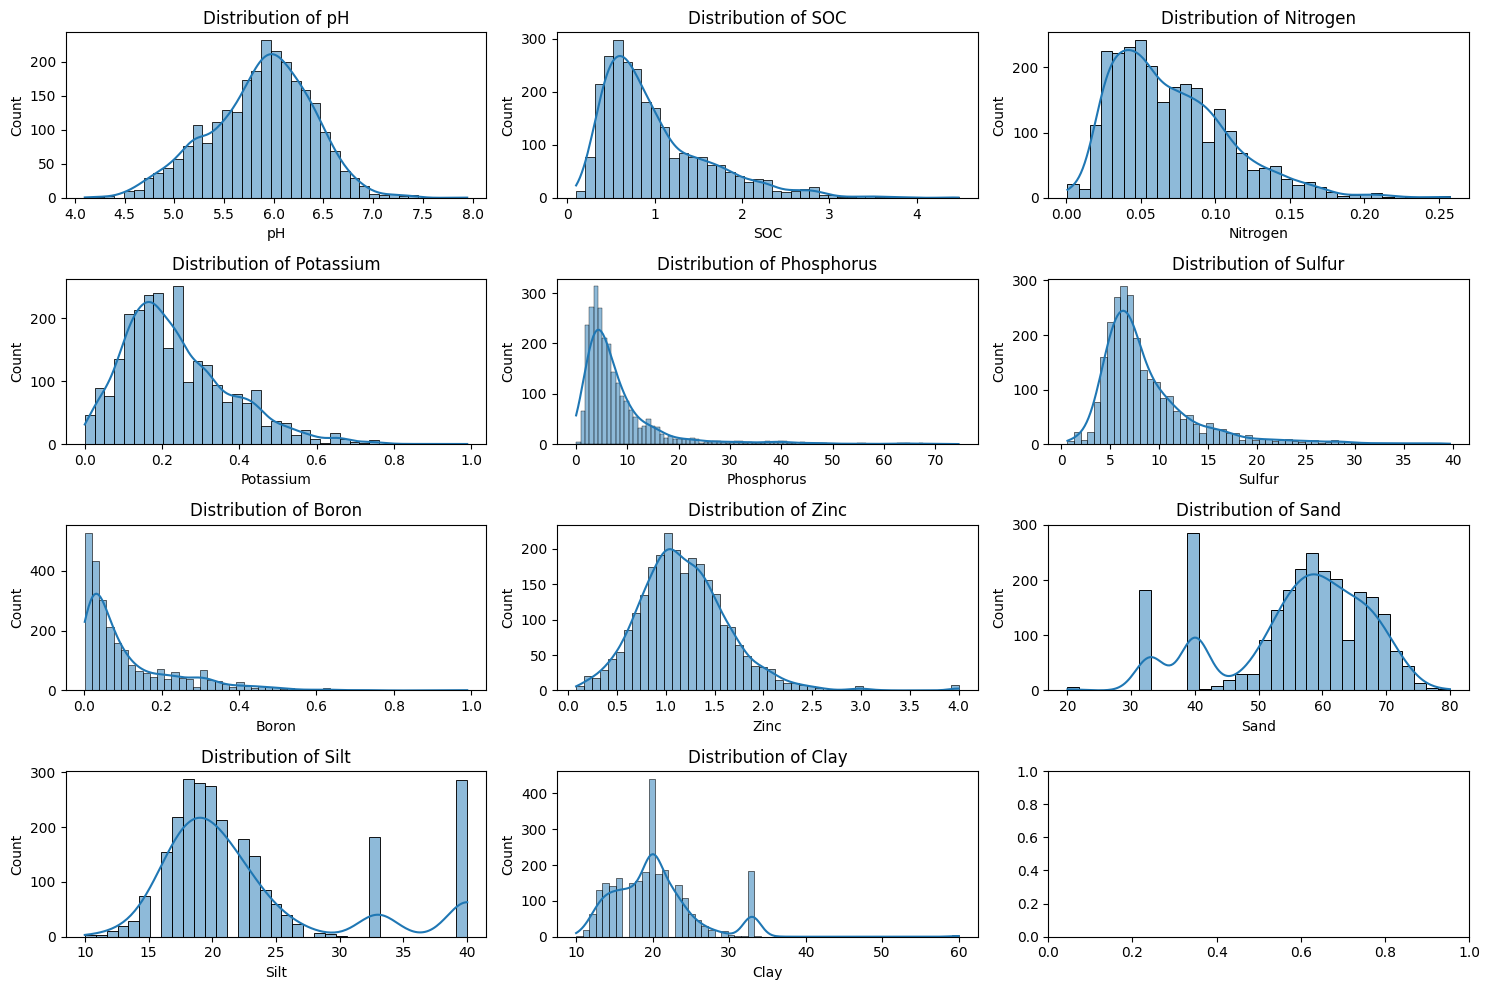

In [ ]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Iterate through each column and plot its distribution
for i, column in enumerate(df1.columns):
    sns.histplot(data=df1, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

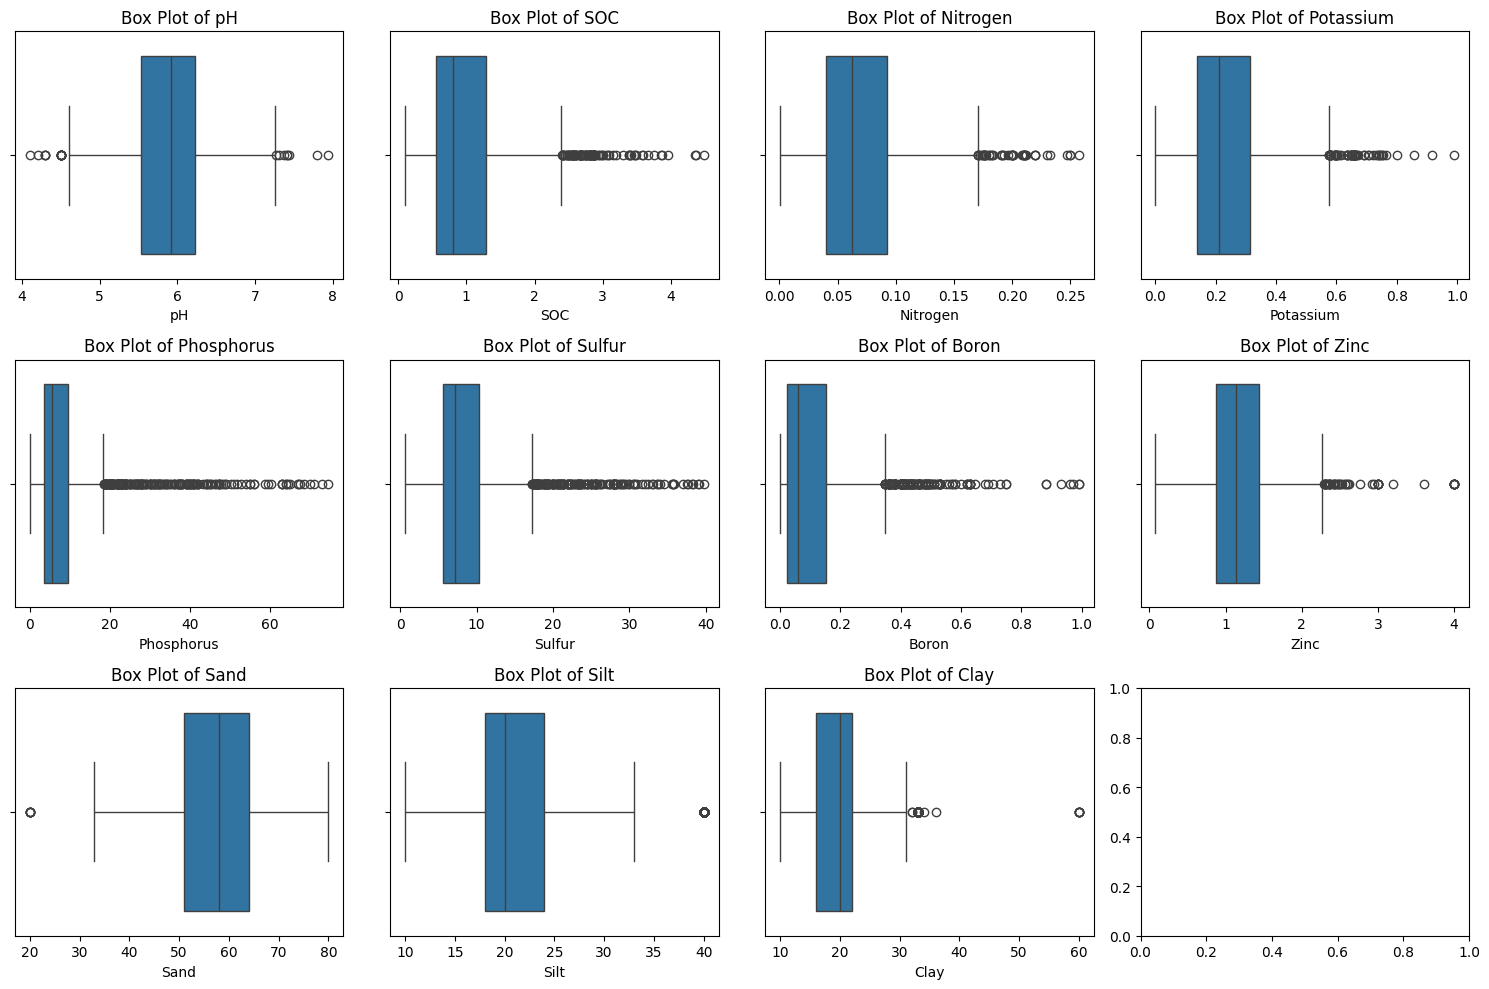

In [ ]:
# Create subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Plot box plots for each column
for i, column in enumerate(df1.columns):
    sns.boxplot(x=df1[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
df1.isnull().values.any()

False

In [ ]:
df1.duplicated().any()

False

In [ ]:
# Separate features and targets
targets = ['SOC', 'Boron', 'Zinc']
X = df1.drop(columns=targets)
y = df1[targets]

### Preprocessing

In [ ]:
# Numerical Columns
numerical_cols = X.columns.tolist()

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("yeo_johnson", PowerTransformer(method="yeo-johnson")),  # Yeo-Johnson Transformation
            ("scaler", StandardScaler())                        # Standard Scaling
        ]), numerical_cols)
    ]
)

# Fit the Preprocessor
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
pipeline.fit(X_train)

# Transform the Data
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Convert back to DataFrame for visualization
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=numerical_cols)



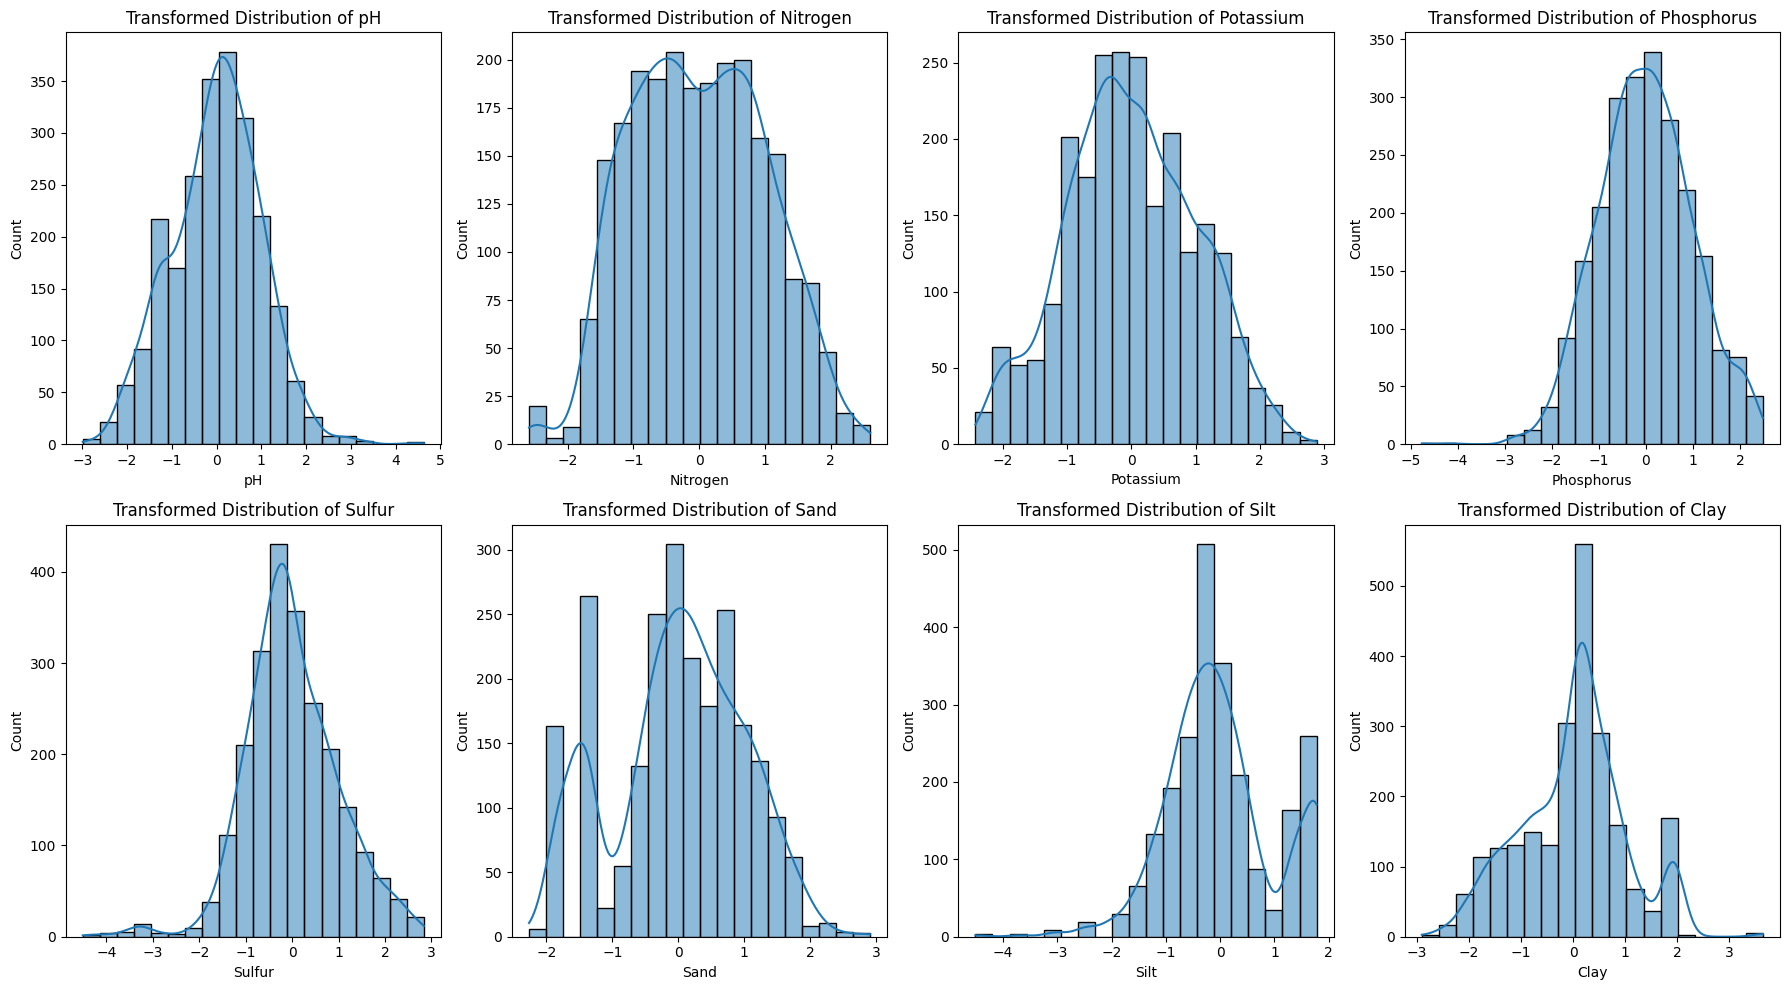

In [ ]:
# Plot the Transformed Distributions
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(X_train_transformed_df.columns):
    sns.histplot(X_train_transformed_df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f"Transformed Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Hyperparameter Tuning using Randomized Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures
import warnings

In [ ]:
# # Suppress warnings
# warnings.filterwarnings("ignore")

# Define scoring metrics (R²)
scorer = make_scorer(r2_score)

# Define models and hyperparameter grids
model_configs = [
    {
        "name": "Linear Regression (Polynomial)",
        "model": MultiOutputRegressor(LinearRegression()),
        "param_grid": {"polynomial__degree": [1, 2, 3]},  # Degrees for Polynomial Features
        "use_poly": True,
    },
    {
        "name": "XGBRegressor",
        "model": MultiOutputRegressor(XGBRegressor()),
        "param_grid": {
            "estimator__n_estimators": [500, 1000, 1500],
            "estimator__max_depth": [3, 6, 9],
            "estimator__learning_rate": [0.01, 0.02, 0.03],
            "estimator__subsample": [0.6, 0.8, 1.0],
            "estimator__colsample_bytree": [0.6, 0.8, 1.0],
        },
        "use_poly": False,
    },
]


In [ ]:
# Prepare cross-validation setup
cv = KFold(n_splits=20, shuffle=True, random_state=42)

# Initialize results container
results = []

In [ ]:
# Iterate through model configurations
for config in model_configs:
    print(f"\nOptimizing {config['name']}...")

    model = config["model"]
    param_grid = config["param_grid"]

    # Use pipeline for polynomial features if required
    if config["use_poly"]:
        pipeline = Pipeline([
            ("polynomial", PolynomialFeatures(include_bias=False)),
            ("scaler", StandardScaler()),  # Optional scaling
            ("model", model),
        ])
    else:
        pipeline = model

    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_grid,
        scoring=scorer,
        n_iter=10,
        cv=cv,
        verbose=1,
        n_jobs=-1,
        random_state=42,
        refit=True,
        return_train_score=True
    )

    # Fit the model
    random_search.fit(X_train, y_train)

    # Extract the best model and parameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    # Cross-validation results: Training and validation R² scores
    cv_train_scores = random_search.cv_results_['mean_train_score']
    cv_val_scores = random_search.cv_results_['mean_test_score']

    # Get the average of the training and validation R² scores
    avg_train_r2 = np.mean(cv_train_scores)
    avg_val_r2 = np.mean(cv_val_scores)

    # Test set evaluation
    predictions = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, predictions)
    test_r2 = r2_score(y_test, predictions)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, predictions)

    # Append results including training and validation R² scores
    results.append({
        "Model": config["name"],
        "Best Params": best_params,
        "CV Train R²": avg_train_r2,
        "CV Val R²": avg_val_r2,
        "Test MSE": test_mse,
        "Test R²": test_r2,
        "Test RMSE": test_rmse,
        "Test MAE": test_mae,
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\nFinal Model Performance:")
results_df


Optimizing Linear Regression (Polynomial)...
Fitting 20 folds for each of 3 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Optimizing XGBRegressor...
Fitting 20 folds for each of 10 candidates, totalling 200 fits

Final Model Performance:


,Model,Best Params,CV Train R²,CV Val R²,Test MSE,Test R²,Test RMSE,Test MAE
0,Linear Regression (Polynomial),{'polynomial__degree': 2},0.633275,0.555952,0.068817,0.625377,0.262329,0.167246
1,XGBRegressor,"{'estimator__subsample': 0.6, 'estimator__n_es...",0.930246,0.598029,0.060163,0.660807,0.245281,0.158350


In [20]:
# Sort results and identify the best model
results_df = results_df.sort_values("Test R²", ascending=False)
best_model_name = results_df.iloc[0]["Model"]
print(f"\nBest Model: {best_model_name}")


Best Model: XGBRegressor


In [21]:
# Print the best parameters for each model
print("\nBest Parameters for Each Model:")
for _, row in results_df.iterrows():
    print(f"{row['Model']}: {row['Best Params']}")


Best Parameters for Each Model:
XGBRegressor: {'estimator__subsample': 0.6, 'estimator__n_estimators': 1500, 'estimator__max_depth': 3, 'estimator__learning_rate': 0.01, 'estimator__colsample_bytree': 0.6}
Linear Regression (Polynomial): {'polynomial__degree': 2}


In [22]:
# Assuming `y_test` as the ground truth and `predictions` is the predicted output.
num_targets = y_test.shape[1] if len(y_test.shape) > 1 else 1
performance = []

for i in range(num_targets):
    true_values = y_test.iloc[:, i] if isinstance(y_test, pd.DataFrame) else y_test[:, i]
    predicted_values = predictions[:, i]

    r2 = r2_score(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predicted_values)

    performance.append({
        "Target": y_test.columns[i] if isinstance(y_test, pd.DataFrame) else f"Target {i+1}",
        "R2": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
    })

# Convert to a DataFrame for better readability
performance_df = pd.DataFrame(performance)
print("\nPerformance Metrics for Each Target:")
performance_df



Performance Metrics for Each Target:


,Target,R2,MSE,RMSE,MAE
0,SOC,0.827724,0.068378,0.261492,0.177894
1,Boron,0.637389,0.008024,0.089577,0.046675
2,Zinc,0.517309,0.104086,0.322623,0.250482


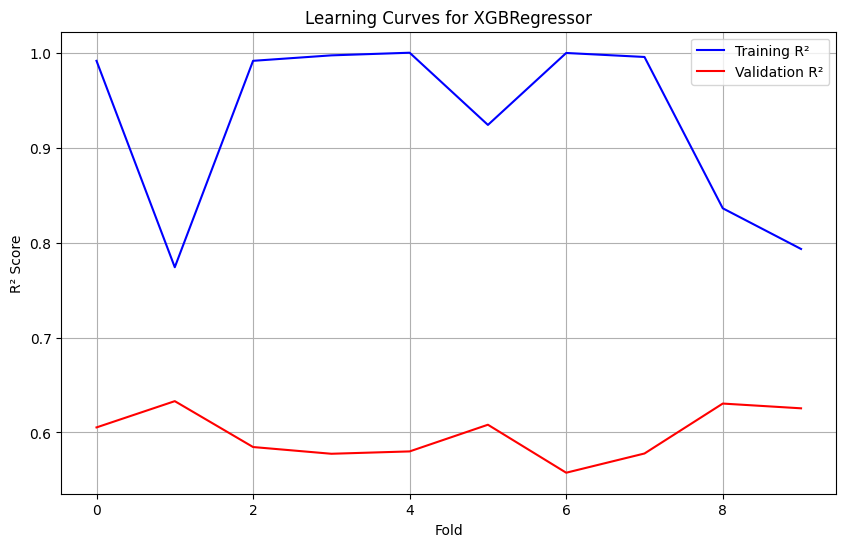

In [23]:
# Plot Learning Curves for the best model
plt.figure(figsize=(10, 6))
plt.plot(cv_train_scores, label="Training R²", color='blue')
plt.plot(cv_val_scores, label="Validation R²", color='red')
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.title(f"Learning Curves for {config['name']}")
plt.legend()
plt.grid(True)
plt.show()

**Observations**:
High Training R-squared: The training R-squared values are consistently high, suggesting that the model is able to fit the training data well.
High Validation R-squared: The validation R-squared values are also relatively high, indicating that the model is generalizing well to unseen data.
Gap Between Training and Validation R-squared: There is a small gap between the training and validation R-squared curves. This indicates a good balance between model complexity and generalization ability. A large gap would suggest overfitting, while a very small gap might indicate underfitting.

**Stability**: The R-squared values for both training and validation sets exhibit some fluctuation across the folds. However, the overall trend seems relatively stable, suggesting that the model's performance is consistent across different data splits.

**Interpretation**:
Good Model Performance: The learning curves suggest that the XGBRegressor model is performing well. It is able to fit the training data well while maintaining good generalization ability to unseen data.
Potential for Improvement: While the model seems to be performing well, there might still be room for improvement. Techniques such as hyperparameter tuning, feature engineering, or exploring different model architectures could potentially further enhance the model's performance.

**Overall**:
The learning curves indicate that the XGBRegressor model is performing well, but further analysis and optimization could potentially lead to even better results.

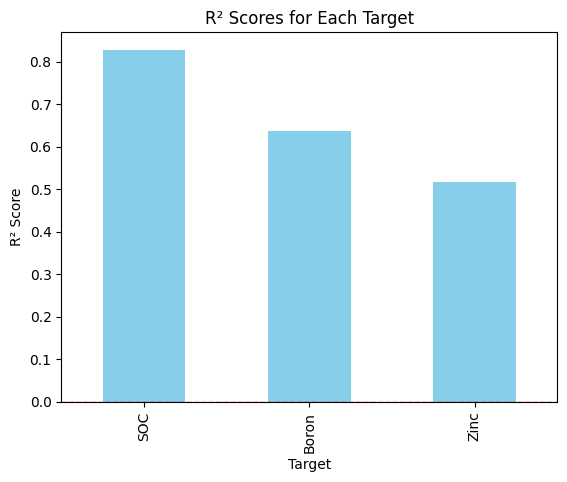

In [24]:
# Bar Plot for R_Squared
performance_df.plot(kind='bar', x='Target', y='R2', legend=False, color='skyblue')
plt.title("R² Scores for Each Target")
plt.ylabel("R² Score")
plt.xlabel("Target")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.show()

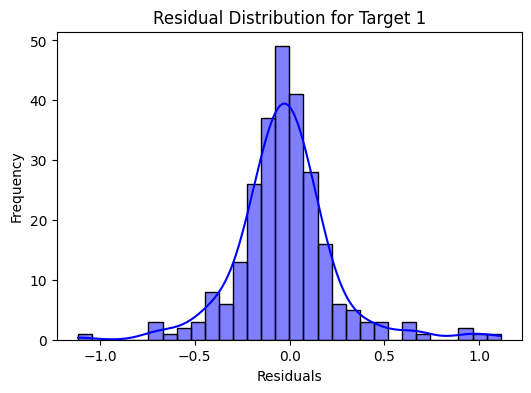

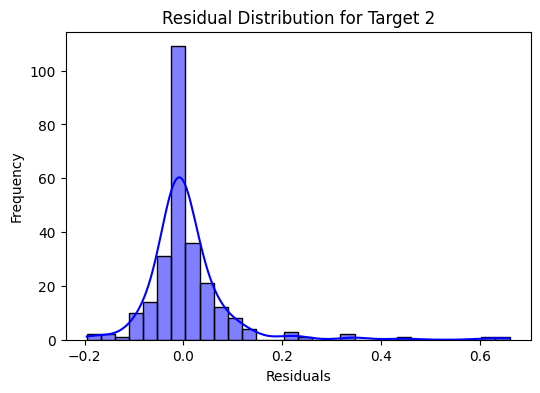

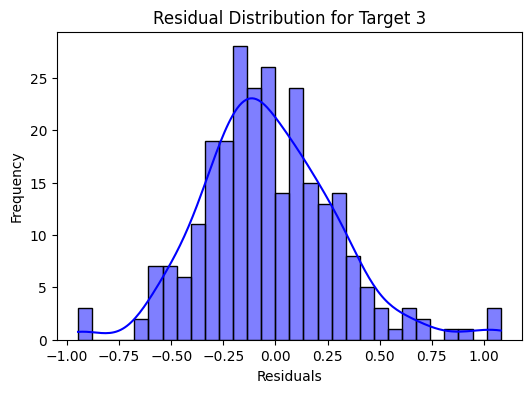

In [25]:
# Plot for Error distribution
import seaborn as sns

for i in range(num_targets):
    true_values = y_test.iloc[:, i] if isinstance(y_test, pd.DataFrame) else y_test[:, i]
    predicted_values = predictions[:, i]
    residuals = true_values - predicted_values

    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=30, color="blue")
    plt.title(f"Residual Distribution for Target {i+1}")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()
